In [1]:
import torch
torch.set_default_dtype(torch.float64)
import numpy as np 
import scipy.stats
import matplotlib
from matplotlib import pyplot
pyplot.style.use("seaborn-v0_8-whitegrid")
# COLORS = ["xkcd:"+color[:-1] for color in pd.read_csv("../../../xkcd_colors.txt",comment="#",header=None).iloc[:,0].tolist()][::-1]
# pyplot.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=COLORS)
LINESTYLES = ['solid','dotted','dashed','dashdot',(0, (1, 1))]
DEFAULTFONTSIZE = 30
pyplot.rcParams['xtick.labelsize'] = DEFAULTFONTSIZE
pyplot.rcParams['ytick.labelsize'] = DEFAULTFONTSIZE
pyplot.rcParams['ytick.labelsize'] = DEFAULTFONTSIZE
pyplot.rcParams['axes.titlesize'] = DEFAULTFONTSIZE
pyplot.rcParams['figure.titlesize'] = DEFAULTFONTSIZE
pyplot.rcParams["axes.labelsize"] = DEFAULTFONTSIZE
pyplot.rcParams['legend.fontsize'] = DEFAULTFONTSIZE
pyplot.rcParams['font.size'] = DEFAULTFONTSIZE
pyplot.rcParams['lines.linewidth'] = 5
pyplot.rcParams['lines.markersize'] = 15
PW = 30 # inches

x.shape = (10, 1)
y.shape = (10,)


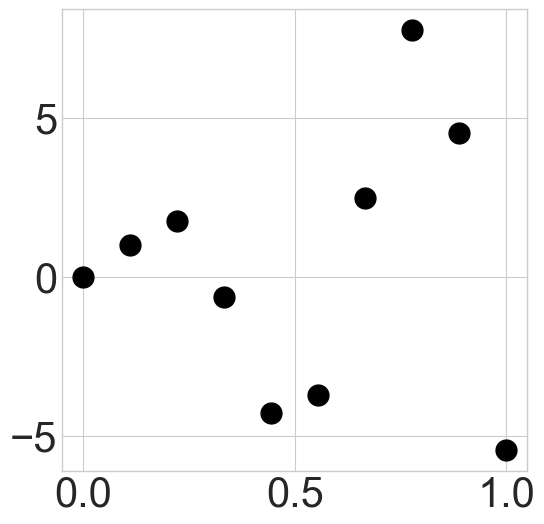

In [2]:
n = 10
d = 1 
rng = torch.Generator().manual_seed(11)
x = torch.linspace(0,1,n)[:,None]
f = lambda x: torch.sum(10*x*torch.sin(10*x),dim=-1)
y = f(x)
print("x.shape = %s"%str(tuple(x.shape)))
print("y.shape = %s"%str(tuple(y.shape)))
fig,ax = pyplot.subplots(nrows=1,ncols=1,figsize=(PW/5,PW/5))
ax.scatter(x,y,color="black");

w.shape = (10000, 1)
z.shape = (10, 20000)
kmat.shape = (10, 10)
kmat_rff.shape = (10, 10)


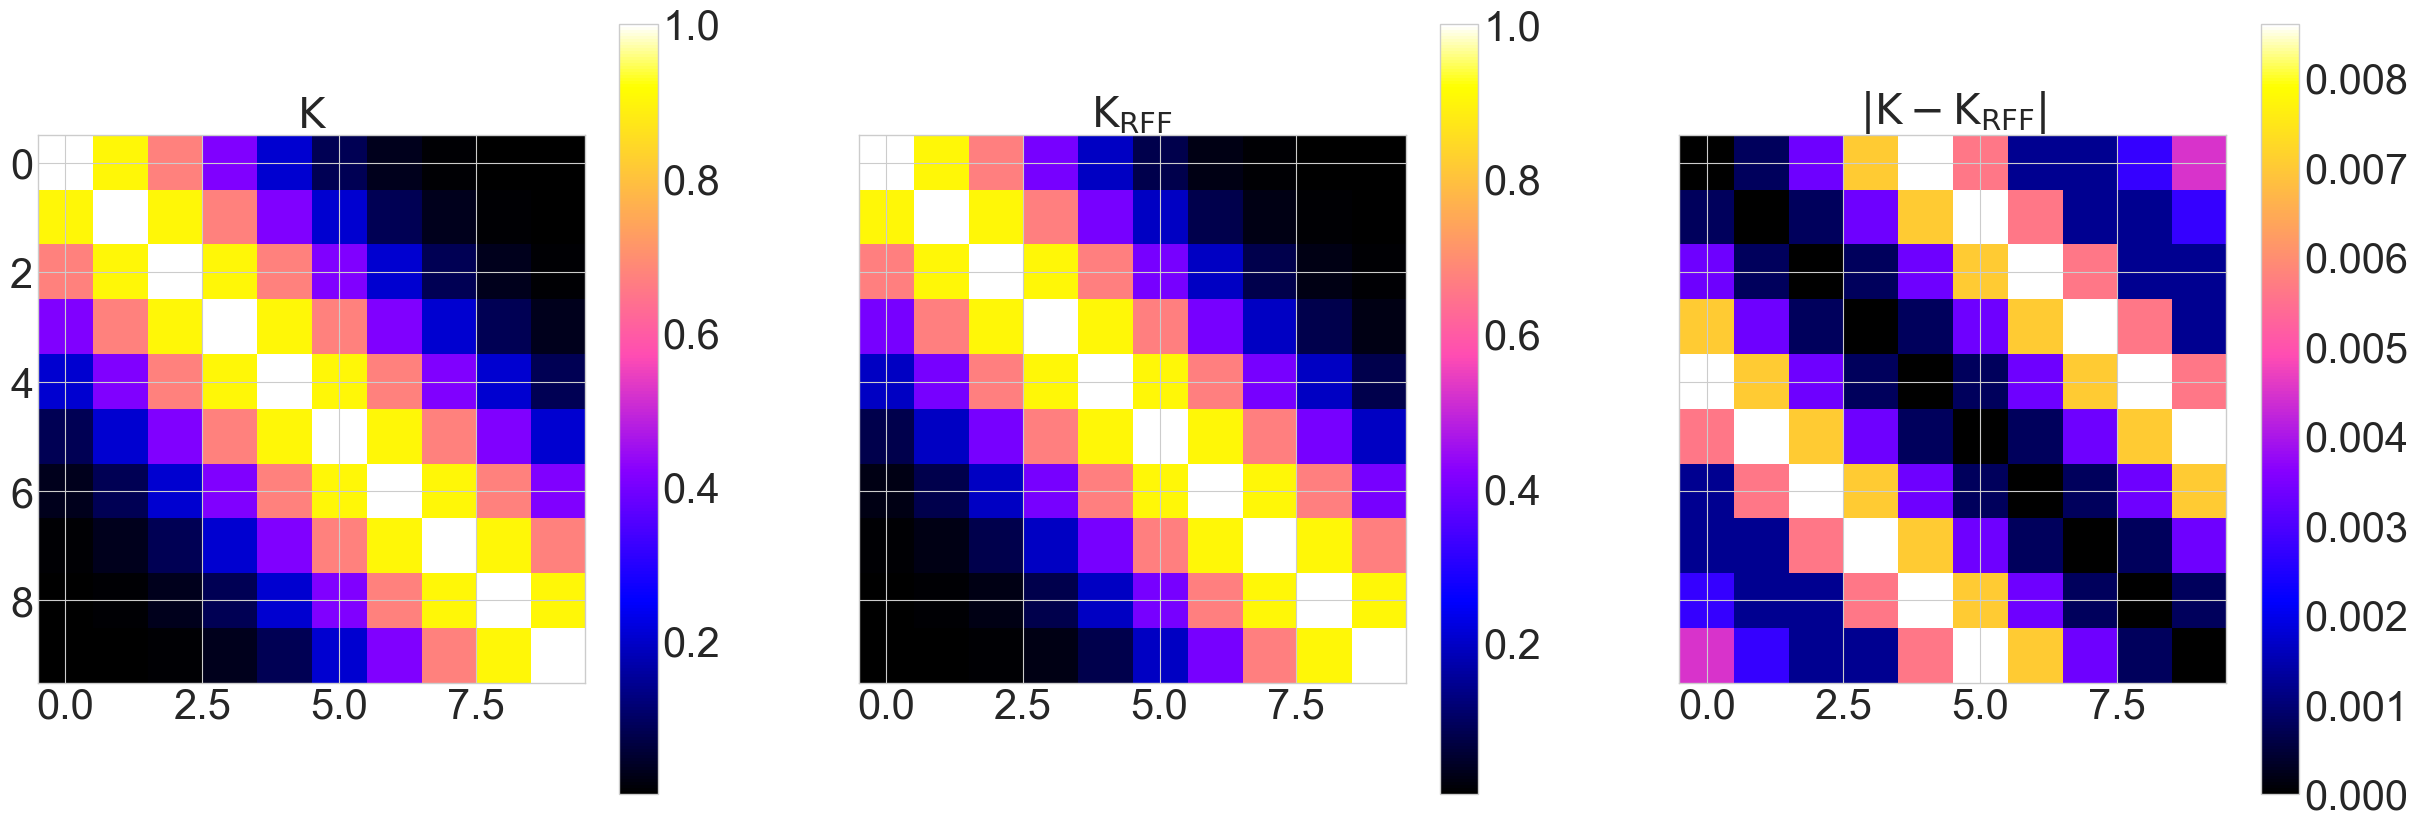

In [3]:
sigma = .25
def kernel_se(x, y):
    return torch.exp(-torch.linalg.norm(x-y,dim=-1)**2/(2*sigma**2))
N = 10000
eps = 1e-8
epsI = eps*torch.eye(n)
w = torch.randn(N,d,generator=rng)/sigma
print("w.shape = %s"%str(tuple(w.shape)))
z = 1/np.sqrt(N)*torch.cat([
    torch.cos(torch.einsum("ij,...kj->...ki",w,x)),
    torch.sin(torch.einsum("ij,...kj->...ki",w,x))
    ],dim=-1)
print("z.shape = %s"%str(tuple(z.shape)))
kmat = kernel_se(x[:,None,:],x[None,:,:])+epsI
print("kmat.shape = %s"%str(tuple(kmat.shape)))
kmat_rff = z@z.T+epsI
print("kmat_rff.shape = %s"%str(tuple(kmat_rff.shape)))
fig,ax = pyplot.subplots(nrows=1,ncols=3,figsize=(3*PW/3,PW/3),sharex=True,sharey=True)
ax[0].set_title(r"$\mathsf{K}$")
_ck = ax[0].imshow(kmat,cmap="gnuplot2")
fig.colorbar(_ck)
ax[1].set_title(r"$\mathsf{K}_\mathrm{RFF}$")
_ckhat = ax[1].imshow(kmat_rff,cmap="gnuplot2")
fig.colorbar(_ckhat)
ax[2].set_title(r"$| \mathsf{K} - \mathsf{K}_\mathrm{RFF} |$")
_cerror = ax[2].imshow((kmat-kmat_rff).abs(),cmap="gnuplot2")
fig.colorbar(_cerror);

alpha.shape = (10,)
alpha_rff.shape = (10,)
yquery.shape = (100,)
kcross.shape = (100, 10)
    L2 relative error yhat: 2.5e-03
L2 relative error yhat_rff: 1.1e-01


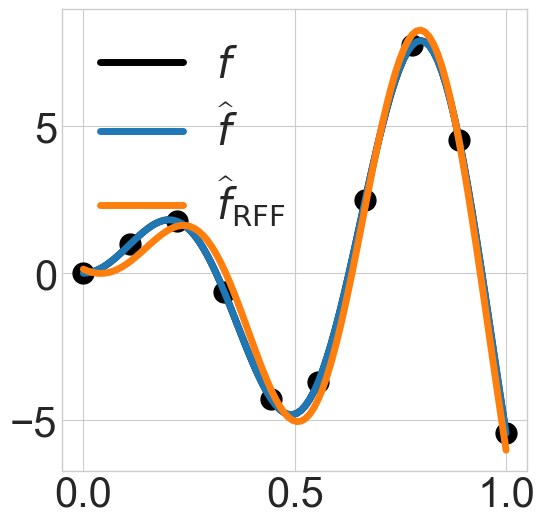

In [7]:
alpha = torch.cholesky_solve(y[:,None],torch.linalg.cholesky(kmat))[:,0]
print("alpha.shape = %s"%str(tuple(alpha.shape)))
alpha_rff = torch.cholesky_solve(y[:,None],torch.linalg.cholesky(kmat_rff))[:,0]
print("alpha_rff.shape = %s"%str(tuple(alpha_rff.shape)))
nquery = 100
xquery = torch.linspace(0,1,nquery)[:,None]
yquery = f(xquery)
print("yquery.shape = %s"%str(tuple(yquery.shape)))
kcross = kernel_se(xquery[:,None,:],x[None,:,:])
print("kcross.shape = %s"%str(tuple(kcross.shape)))
yhat = kcross@alpha 
yhat_rff = kcross@alpha_rff
l2rerror = torch.linalg.norm(yhat-yquery)/torch.linalg.norm(yquery)
l2rerror_rff = torch.linalg.norm(yhat_rff-yquery)/torch.linalg.norm(yquery)
print("    L2 relative error yhat: %.1e"%l2rerror)
print("L2 relative error yhat_rff: %.1e"%l2rerror_rff)
fig,ax = pyplot.subplots(nrows=1,ncols=1,figsize=(PW/5,PW/5))
ax.scatter(x,y,color="black")
ax.plot(xquery,yquery,color="black",label=r"$f$")
ax.plot(xquery,yhat,label=r"$\widehat{f}$")
ax.plot(xquery,yhat_rff,label=r"$\widehat{f}_\mathrm{RFF}$")
ax.legend();